## E3 Fundamentals of Visualization libraries Part 1 ß Matplotlib

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt

In [2]:
import matplotlib
matplotlib.__version__

'3.9.3'

In [3]:
#import data

df = pd.read_csv('NY_data_sample.csv', index_col = 0)

C:\Users\Barb\AppData\Local\Temp\ipykernel_12024\1702794093.py:3: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('NY_data_sample.csv', index_col = 0)


In [4]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp', '_merge'],
      dtype='object')

In [5]:
df.shape

(5967761, 16)

## Line plot
### Dual-axis line plot

#### Plot avg temp vs date

##### Slim down the df dataframe by (1) dropping unnecessary columns and (2) Dropping duplicates

##### (1) Drop unnecessary columns - only keep date and avgTemp columns

In [6]:
df_drop_col = df.drop(columns = ['_merge', 'ride_id', 'rideable_type', 'started_at', 'ended_at', 'start_station_name', 'start_station_id', 'end_station_name', 'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng', 'member_casual'])

In [7]:
#Check if columns were dropped

In [8]:
df_drop_col.head()

,date,avgTemp
25092672,2022-10-20,11.1
850261,2022-01-19,3.2
25461273,2022-10-31,14.4
8836007,2022-05-02,12.1
20383470,2022-09-20,23.2


##### (2) Remove duplicate rows

In [9]:
# find duplicate rows for df containing only date and avgTemp
           #1st - Find the total # of rows of df_drop_col

In [10]:
df_drop_col.shape

(5967761, 2)

In [11]:
           #2nd - find the number of duplicate rows

In [12]:
df_dups = df_drop_col[df_drop_col.duplicated()]

In [13]:
df_dups.shape

(5967385, 2)

In [14]:
            #3rd - create df_no_dups which comtains no duplicates

In [15]:
df_no_dups = df_drop_col.drop_duplicates()

In [16]:
df_no_dups.shape      

(376, 2)

In [17]:
#check to see that duplicates were removed
##df_drop_col - df_no_dups = # of duplicate rows


In [18]:
df_no_dups.dtypes

date        object
avgTemp    float64
dtype: object

In [19]:
#Change date to datetime64 format; reading data from csv file automatically puts date in object format
df_no_dups['date'] = pd.to_datetime(df_no_dups['date'])

C:\Users\Barb\AppData\Local\Temp\ipykernel_12024\253987533.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_dups['date'] = pd.to_datetime(df_no_dups['date'])


In [20]:
df_no_dups.dtypes

date       datetime64[ns]
avgTemp           float64
dtype: object

In [21]:
df_no_dups

,date,avgTemp
25092672,2022-10-20,11.1
850261,2022-01-19,3.2
25461273,2022-10-31,14.4
8836007,2022-05-02,12.1
20383470,2022-09-20,23.2
...,...,...
1887411,2021-12-08,NaN
2167335,2021-03-14,NaN
546228,2021-12-26,NaN
10829245,2021-03-11,NaN


### Basic plotting with pandas

### Plotting average temperatures vs date

In [22]:
df_temp = df_no_dups.set_index('date')

In [23]:
df_datesort = df_temp.sort_values(by = 'date')

In [24]:
df_datesort

,avgTemp
date,
2021-03-11,NaN
2021-03-14,NaN
2021-04-30,NaN
2021-08-16,NaN
2021-11-16,NaN
...,...
2022-12-27,-0.7
2022-12-28,3.4
2022-12-29,6.4


In [25]:
#Find missing temperature values

df_datesort.isnull().sum()

avgTemp    11
dtype: int64

In [26]:
#create subset of df_datesort that contains only missing values

In [27]:
df_nan = df_datesort[df_datesort['avgTemp'].isnull() == True]

In [28]:
df_nan

,avgTemp
date,
2021-03-11,NaN
2021-03-14,NaN
2021-04-30,NaN
2021-08-16,NaN
2021-11-16,NaN
2021-12-08,NaN
2021-12-19,NaN
2021-12-26,NaN
2021-12-29,NaN


In [29]:
#So, 9/374 temps are missing
# What do I with the missing data? Ignore them, impute the values or remove the missing data?
# I will remove the missing values because all of the temps are in 2021; just interested in year 2022

In [30]:
#create df w/o missing avgTemps

df_temp_clean = df_datesort[df_datesort['avgTemp'].isnull() == False]

In [31]:
df_temp_clean.shape

(365, 1)

In [32]:
import matplotlib as mpl

In [33]:
mpl.rcParams['agg.path.chunksize'] = 10000.

In [34]:
df_temp_clean.tail()

,avgTemp
date,
2022-12-27,-0.7
2022-12-28,3.4
2022-12-29,6.4
2022-12-30,9.3
2022-12-31,8.2


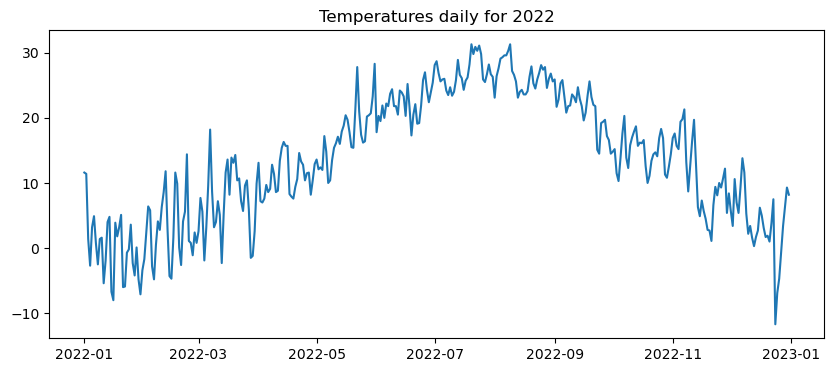

In [35]:
plt.figure(figsize=(10,4))
plt.title('Temperatures daily for 2022')
plt.plot(df_temp_clean['avgTemp'])
plt.show()

### Aggregate Bike trips 

In [36]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp', '_merge'],
      dtype='object')

In [37]:
# Groupby the count of the trips 

df_group = pd.DataFrame(df.groupby(['date'])['ride_id'].count()).reset_index()

In [38]:
df_group.head()

,date,ride_id
0,2021-03-11,1
1,2021-03-14,1
2,2021-04-30,1
3,2021-08-16,1
4,2021-11-16,1


In [39]:
df_group.shape

(376, 2)

In [40]:
df_group.dtypes

date       object
ride_id     int64
dtype: object

In [41]:
#Before merging, I need to change the datatype of the date column in df_group to match that of df_no_dups
#Change datatype of date column in df_group 

In [42]:
df_group['date'] = pd.to_datetime(df_group['date'])

In [43]:
df_group.dtypes

date       datetime64[ns]
ride_id             int64
dtype: object

In [44]:
#Find missing ride_id values


df_group.isnull().sum()

date       0
ride_id    0
dtype: int64

### Merge trip aggregations and temperatures

In [45]:
df2 = df_no_dups.merge(df_group, on = 'date', how = 'outer')                      #Both df_no_dups & df_group have 374 values 

In [46]:
df_temp2 = df2.set_index('date')

In [47]:
df_datesort2 = df_temp2.sort_values(by = 'date')

In [48]:
df_datesort2.head(10)

,avgTemp,ride_id
date,,
2021-03-11,NaN,1
2021-03-14,NaN,1
2021-04-30,NaN,1
2021-08-16,NaN,1
2021-11-16,NaN,1
2021-12-08,NaN,1
2021-12-19,NaN,1
2021-12-26,NaN,1
2021-12-29,NaN,1


In [49]:
print("Shape of January 1st is", df[df['date'] == '2022-01-01'].shape) # Check 
print("Shape of January 2nd is", df[df['date'] == '2022-01-02'].shape) # Second check

Shape of January 1st is (4028, 16)
Shape of January 2nd is (8571, 16)


In [50]:
#create subset of df_datesort2 that contains only missing values

In [51]:
df_nan2 = df_datesort2[df_datesort2['avgTemp'].isnull() == True]

In [52]:
df_nan2

,avgTemp,ride_id
date,,
2021-03-11,NaN,1
2021-03-14,NaN,1
2021-04-30,NaN,1
2021-08-16,NaN,1
2021-11-16,NaN,1
2021-12-08,NaN,1
2021-12-19,NaN,1
2021-12-26,NaN,1
2021-12-29,NaN,1


In [53]:
#So, 9/374 temps are missing
# What do I with the missing data? Ignore them, impute the values or remove the missing data?
# I will remove the missing values

In [54]:
#create df w/o missing avgTemps

df_temp_clean2 = df_datesort2[df_datesort2['avgTemp'].isnull() == False]

In [55]:
df_temp_clean2.shape

(365, 2)

### OO approach

#### Final dual plot

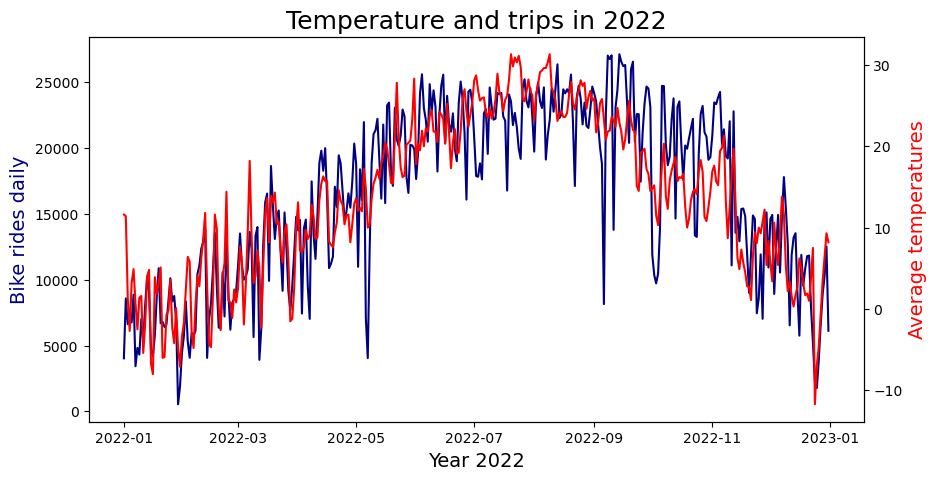

In [56]:
# Create figure and axis objects with subplots() and details

fig,ax = plt.subplots(figsize=(10, 5))

# Make a plot of the bike rides
ax.plot(df_temp_clean2['ride_id'],color = "navy")
ax.set_xlabel("Year 2022", fontsize = 14) # set x-axis label
ax.set_ylabel("Bike rides daily",color = "navy", fontsize = 14) # set y-axis label

# Here is where we create the dual axis - initialize a twin object for two different y-axis on the sample plot
ax2 = ax.twinx()

# Make a plot with the temperatues on the y-axis using second axis object
ax2.plot(df_temp_clean2["avgTemp"], color = "red")
ax2.set_ylabel("Average temperatures", color = "red",fontsize=14)
plt.title('Temperature and trips in 2022', fontsize = 18)
plt.show()

## #I used the object-oriented programming approach. First, I greated a graph of daily bike rides. Then, I made a dual axis for the avg temp graph.

In [57]:
# save the plot as a file
fig.savefig('trips_temperatures_dual_line.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')


### Export the df

In [58]:
#path = r'C:\Users\Barb\CitiBike'

In [59]:
#df_temp_clean2.to_csv(os.path.join(path,'02Data', 'Prepared', 'NY_data_sample_2-3.csv'))